imp file :https://stackoverflow.com/questions/66929833/object-detection-model-for-detecting-rectangular-shape-text-cursor-in-a-video

In [36]:
import cv2
import numpy as np

# Bounding box Measurements.
BOX_WIDTH = 40 
BOX_HEIGHT = 40

def process_img(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converts color to back and white
    kernel = np.ones((5, 5)) # matrix filter (not used any where)
    img_canny = cv2.Canny(img_gray, 50, 50) #edge detection
    return img_canny

def get_contour(img):
    contours, hierarchies = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    if contours:
        return max(contours, key=cv2.contourArea)

def get_line_tip(cnt1, cnt2):
    x1, y1, w1, h1 = cv2.boundingRect(cnt1)

    if h1 > BOX_HEIGHT / 2:
        if np.any(cnt2):
            x2, y2, w2, h2 = cv2.boundingRect(cnt2)
            if x1 < x2:
                return x1, y1
        return x1 + w1, y1

def get_rect(x, y):
    half_width = BOX_WIDTH // 2
    lift_height = BOX_HEIGHT // 6
    return (x - half_width, y - lift_height), (x + half_width, y + BOX_HEIGHT - lift_height)

cap = cv2.VideoCapture("/Users/jatavathpavannaik/Documents/ICodeTest/Test_cases/Screen Recording 2024-05-19 at 5.25.28 PM.mov")
success, img_past = cap.read()

cnt_past = np.array([])
line_tip_past = 0, 0

coordinates=[]
while True:
    success, img_live = cap.read()

    if not success:
        break

    img_live_processed = process_img(img_live)
    img_past_processed = process_img(img_past)

    img_diff = cv2.bitwise_xor(img_live_processed, img_past_processed)
    cnt= get_contour(img_diff)

    line_tip = get_line_tip(cnt, cnt_past)

    if line_tip:
        cnt_past = cnt
        line_tip_past = line_tip
        coordinates.append(line_tip)
    else:
        line_tip = line_tip_past

    rect = get_rect(*line_tip)
    img_past = img_live.copy()
    cv2.rectangle(img_live, *rect, (0, 255, 0), 2)

    cv2.imshow("Cursor", img_live)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
    
cv2.destroyAllWindows()

In [ ]:
coordinates

# Test Case

In [ ]:
import cv2
import numpy as np

BOX_WIDTH = 40
BOX_HEIGHT = 40

def process_img(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
    img_canny = cv2.Canny(img_blurred, 100, 200)  # Adjusted thresholds
    img_dilated = cv2.dilate(img_canny, np.ones((3, 3), np.uint8), iterations=1)
    return img_dilated

def get_contour(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 5]  # Filter tiny contours
        if filtered_contours:
            return max(filtered_contours, key=cv2.contourArea)
    return None

def get_line_tip(cnt1, cnt2):
    x1, y1, w1, h1 = cv2.boundingRect(cnt1)
    if cnt2 is not None:
        x2, y2, w2, h2 = cv2.boundingRect(cnt2)
        direction = "left" if x1 < x2 else "right"
    else:
        direction = "static"
    return x1 + w1 // 2, y1 + h1 // 2, direction

def get_rect(x, y):
    half_width = BOX_WIDTH // 2
    lift_height = BOX_HEIGHT // 6
    return (x - half_width, y - lift_height), (x + half_width, y + BOX_HEIGHT - lift_height)

cap = cv2.VideoCapture("/Users/jatavathpavannaik/Documents/ICodeTest/Screen Recording 2024-05-18 at 5.09.08 PM.mov")
success, img_past = cap.read()
cnt_past = None
line_tip_past = (0, 0, "static")

while True:
    success, img_live = cap.read()
    if not success:
        break

    img_live_processed = process_img(img_live)
    img_past_processed = process_img(img_past)

    img_diff = cv2.bitwise_xor(img_live_processed, img_past_processed)
    cnt = get_contour(img_diff)

    line_tip = get_line_tip(cnt, cnt_past) if cnt is not None else line_tip_past

    if cnt is not None:
        cnt_past = cnt
        line_tip_past = line_tip
    else:
        line_tip = line_tip_past

    rect = get_rect(line_tip[0], line_tip[1])
    img_past = img_live.copy()
    cv2.rectangle(img_live, *rect, (0, 255, 0), 2)  # Changed color for better visibility

    cv2.imshow("Cursor", img_live)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()


# Test Case 3

In [ ]:
import cv2
import numpy as np
import pandas as pd

# Bounding box Measurements.
BOX_WIDTH = 40
BOX_HEIGHT = 40

def process_img(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # converts color to black and white
    img_canny = cv2.Canny(img_gray, 50, 50)  # edge detection
    return img_canny

def get_contour(img):
    contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    if contours:
        return max(contours, key=cv2.contourArea)
    return None

def get_line_tip(cnt1, cnt2):
    x1, y1, w1, h1 = cv2.boundingRect(cnt1)

    if h1 > BOX_HEIGHT / 2:
        if np.any(cnt2):
            x2, y2, w2, h2 = cv2.boundingRect(cnt2)
            if x1 < x2:
                return x1, y1
        return x1 + w1, y1

def get_rect(x, y):
    half_width = BOX_WIDTH // 2
    lift_height = BOX_HEIGHT // 6
    return (x - half_width, y - lift_height), (x + half_width, y + BOX_HEIGHT - lift_height)

# Setup capture and DataFrame
cap = cv2.VideoCapture("/Users/jatavathpavannaik/Documents/ICodeTest/Screen Recording 2024-05-18 at 5.09.08 PM.mov")
success, img_past = cap.read()
cnt_past = np.array([])
line_tip_past = (0, 0)
frame_count = 0
data = []

while True:
    success, img_live = cap.read()
    if not success:
        break

    img_live_processed = process_img(img_live)
    img_past_processed = process_img(img_past)

    img_diff = cv2.bitwise_xor(img_live_processed, img_past_processed)
    cnt = get_contour(img_diff)

    line_tip = get_line_tip(cnt, cnt_past) if cnt is not None else line_tip_past

    if cnt is not None:
        cnt_past = cnt
        line_tip_past = line_tip
        rect_start, rect_end = get_rect(*line_tip_past)
        x, y = rect_start
        data.append([frame_count, x, y])
    else:
        line_tip = line_tip_past



    img_past = img_live.copy()
    cv2.rectangle(img_live, rect_start, rect_end, (0, 0, 255), 2)

    cv2.imshow("Cursor", img_live)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_count += 1

cv2.destroyAllWindows()

# Convert list to DataFrame
df = pd.DataFrame(data, columns=['Frame', 'X', 'Y'])
# print(df.head())  # Show the first few rows of the DataFrame
# df.to_csv('tracked_data.csv', index=False)  # Save the data to a CSV file


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_image_difference(image_path1, image_path2):
    # Load the images
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for simplicity
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # Check if images were loaded
    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    # Ensure images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    # Calculate the absolute difference between the images
    diff = cv2.absdiff(img1, img2)

    # Normalize the difference image to enhance visualization
    diff_normalized = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

    # Apply a colormap for visualization
    heatmap = cv2.applyColorMap(diff_normalized.astype('uint8'), cv2.COLORMAP_JET)

    # Display the images and their difference
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1), plt.imshow(img1, cmap='gray'), plt.title('Image 1'), plt.axis('off')
    plt.subplot(1, 3, 2), plt.imshow(img2, cmap='gray'), plt.title('Image 2'), plt.axis('off')
    plt.subplot(1, 3, 3), plt.imshow(heatmap), plt.title('Difference'), plt.axis('off')
    plt.show()

# Example usage
visualize_image_difference('/Users/jatavathpavannaik/Documents/ICodeTest/Booking.com_1.png', '/Users/jatavathpavannaik/Documents/ICodeTest/Booking.com_2.png')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bounding_boxes_on_changes(image_path1, image_path2):
    # Load the images
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    # Check if images were loaded
    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    # Ensure images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calculate the absolute difference between the images
    diff = cv2.absdiff(gray1, gray2)

    # Threshold the diff image
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Find contours from the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes on img2
    for contour in contours:
        if cv2.contourArea(contour) > 100:  # Filter out small changes
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Convert BGR to RGB for matplotlib compatibility
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Display the second image with bounding boxes
    plt.imshow(img2_rgb)
    plt.title('Second Image with Bounding Boxes')
    plt.axis('off')
    plt.show()

# Example usage
draw_bounding_boxes_on_changes('/Users/jatavathpavannaik/Documents/ICodeTest/Booking.com_1.png', '/Users/jatavathpavannaik/Documents/ICodeTest/Booking.com_2.png')


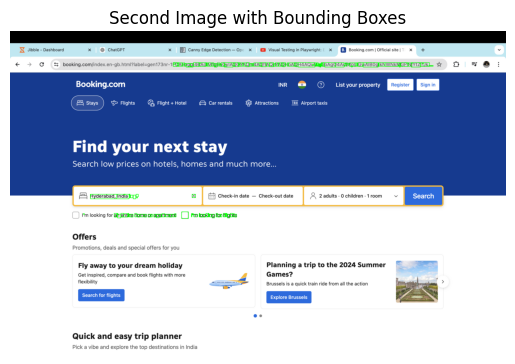

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bounding_boxes_on_changes_and_save(image_path1, image_path2, save_path):
    # Load the images
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    # Check if images were loaded
    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    # Ensure images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calculate the absolute difference between the images
    diff = cv2.absdiff(gray1, gray2)

    # Threshold the diff image
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Find contours from the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes on img2
    for contour in contours:
        if cv2.contourArea(contour) > 0:  # Filter out small changes
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255,0), 2)

    # Save the modified image
    cv2.imwrite(save_path, img2)

    # Convert BGR to RGB for matplotlib compatibility
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Display the second image with bounding boxes
    plt.imshow(img2_rgb)
    plt.title('Second Image with Bounding Boxes')
    plt.axis('off')
    plt.show()

# Example usage
draw_bounding_boxes_on_changes_and_save('/Users/jatavathpavannaik/Documents/ICodeTest/Booking.com_1.png', '/Users/jatavathpavannaik/Documents/ICodeTest/Booking.com_2.png', 'processed_image.jpg')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_image_difference(image_path1, image_path2):
    # Load the images
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for simplicity
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # Check if images were loaded
    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    # Ensure images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    # Calculate the absolute difference between the images
    diff = cv2.absdiff(img1, img2)

    # Normalize the difference image to enhance visualization
    diff_normalized = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

    # Apply a colormap for visualization
    heatmap = cv2.applyColorMap(diff_normalized.astype('uint8'), cv2.COLORMAP_JET)

    # Display the images and their difference
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1), plt.imshow(img1, cmap='gray'), plt.title('Image 1'), plt.axis('off')
    plt.subplot(1, 3, 2), plt.imshow(img2, cmap='gray'), plt.title('Image 2'), plt.axis('off')
    plt.subplot(1, 3, 3), plt.imshow(heatmap), plt.title('Difference'), plt.axis('off')
    plt.show()

# Example usage
visualize_image_difference('/Users/jatavathpavannaik/Documents/ICodeTest/Booking.com_1.png', '/Users/jatavathpavannaik/Documents/ICodeTest/Booking.com_2.png')


In [3]:
import cv2
import numpy as np

def remove_stagnant_frames(video_path, output_path, change_threshold=30, area_threshold=100):
    # Setup video capture
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise FileNotFoundError("Video file could not be opened.")

    # Setup video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID'
    out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
 
    # Read the first frame
    ret, frame1 = cap.read()
    if not ret:
        raise ValueError("Cannot read video file.")
    
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

    while True:
        # Read next frame
        ret, frame2 = cap.read()
        if not ret:
            break
        
        gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        # Calculate the absolute difference and threshold
        diff = cv2.absdiff(gray1, gray2)
        _, thresh = cv2.threshold(diff, change_threshold, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        significant_change = any(cv2.contourArea(contour) > area_threshold for contour in contours)

        if significant_change:
            out.write(frame2)
            gray1 = gray2  # Update the reference frame to the current frame

    # Cleanup
    cap.release()
    out.release()
    print("Processing complete. Output saved to:", output_path)

# Example usage
remove_stagnant_frames('/Users/jatavathpavannaik/Documents/ICodeTest/Screen Recording 2024-05-19 at 3.22.09 PM.mov', 'output_video.mp4')


Processing complete. Output saved to: output_video.mp4


In [7]:
import cv2
import numpy as np

def remove_stagnant_frames(video_path, output_path, change_threshold=30, area_threshold=100):
    # Setup video capture
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise FileNotFoundError("Video file could not be opened.")

    # Obtain input video frame rate and resolution
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Setup video writer with the same frame rate as the input video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID'
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
 
    # Read the first frame
    ret, frame1 = cap.read()
    if not ret:
        raise ValueError("Cannot read video file.")
    
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

    while True:
        # Read next frame
        ret, frame2 = cap.read()
        if not ret:
            break
        
        gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        # Calculate the absolute difference and threshold
        diff = cv2.absdiff(gray1, gray2)
        _, thresh = cv2.threshold(diff, change_threshold, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        significant_change = any(cv2.contourArea(contour) > area_threshold for contour in contours)

        if significant_change:
            out.write(frame2)
            gray1 = gray2  # Update the reference frame to the current frame

    # Cleanup
    cap.release()
    out.release()
    print("Processing complete. Output saved to:", output_path)

# Example usage
remove_stagnant_frames('/Users/jatavathpavannaik/Documents/ICodeTest/Screen Recording 2024-05-19 at 3.22.09 PM.mov', 'output_video.mp4')


Processing complete. Output saved to: output_video.mp4


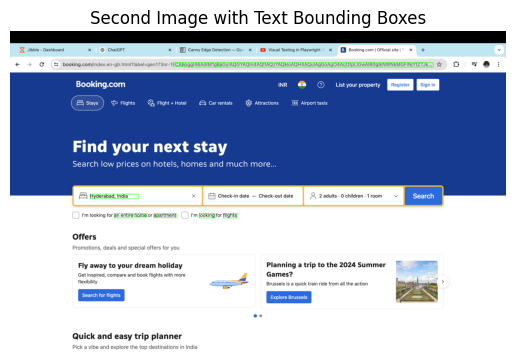

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bounding_boxes_on_text_changes(image_path1, image_path2, save_path):
    # Load the images
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    # Check if images were loaded
    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    # Ensure images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calculate the absolute difference between the images
    diff = cv2.absdiff(gray1, gray2)

    # Threshold the diff image to enhance text differences
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Use morphological operations to close gaps in text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours from the thresholded image
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyze contours to find appropriate bounding boxes for continuous text
    for contour in contours:
        if cv2.contourArea(contour) > 0:  # Filter out small changes
            x, y, w, h = cv2.boundingRect(contour)
            # Apply additional filters to target text-like contours
            if h < 100 and w / h > 2:  # Text typically has a wide aspect ratio
                cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save the modified image
    cv2.imwrite(save_path, img2)

    # Convert BGR to RGB for matplotlib compatibility
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Display the second image with bounding boxes
    plt.imshow(img2_rgb)
    plt.title('Second Image with Text Bounding Boxes')
    plt.axis('off')
    plt.show()

# Example usage
draw_bounding_boxes_on_text_changes('Booking.com_1.png', 'Booking.com_2.png', 'processed_image.jpg')


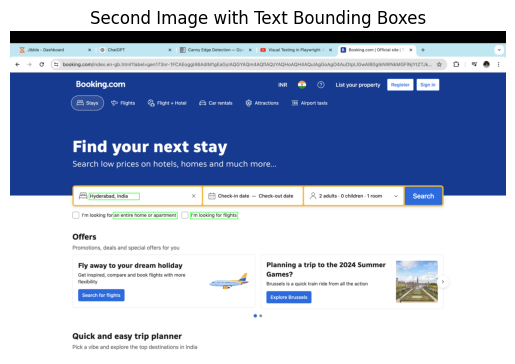

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bounding_boxes_on_text_changes(image_path1, image_path2, save_path):
    # Load the images
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    # Check if images were loaded
    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    # Ensure images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calculate the absolute difference between the images
    diff = cv2.absdiff(gray1, gray2)

    # Apply GaussianBlur to reduce image noise and improve contour detection
    blurred = cv2.GaussianBlur(diff, (5, 5), 0)

    # Threshold the blurred image
    _, thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY)

    # Use morphological operations to close gaps in text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    dilated = cv2.dilate(thresh, kernel, iterations=2)  # Dilate to connect text components

    # Find contours from the dilated image
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes on img2
    for contour in contours:
        if cv2.contourArea(contour) > 100:  # Adjust area threshold to suit specific sensitivity needs
            x, y, w, h = cv2.boundingRect(contour)
            # Filter to target text-like contours based on aspect ratio and size
            if 2 <= w / h <= 10 and h > 10 and w > 10:
                cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save the modified image
    cv2.imwrite(save_path, img2)

    # Convert BGR to RGB for matplotlib compatibility
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Display the second image with bounding boxes
    plt.imshow(img2_rgb)
    plt.title('Second Image with Text Bounding Boxes')
    plt.axis('off')
    plt.show()

# Example usage
draw_bounding_boxes_on_text_changes('Booking.com_1.png', 'Booking.com_2.png', 'processed_image.jpg')


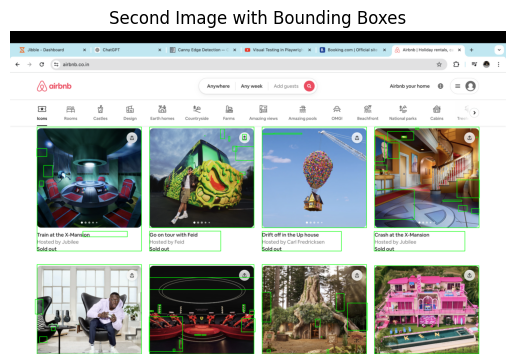

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def group_contours(contours, horizontal_proximity=30, vertical_proximity=30):
    def are_close(c1, c2):
        x1, y1, w1, h1 = cv2.boundingRect(c1)
        x2, y2, w2, h2 = cv2.boundingRect(c2)

        # Check horizontal closeness
        horizontal_close = (abs(x1 - x2) <= horizontal_proximity or abs((x1 + w1) - (x2 + w2)) <= horizontal_proximity)

        # Check vertical closeness
        vertical_close = (abs(y1 - y2) <= vertical_proximity or abs((y1 + h1) - (y2 + h2)) <= vertical_proximity)

        return horizontal_close and vertical_close

    groups = []
    used = set()

    for i in range(len(contours)):
        if i in used:
            continue
        group = [contours[i]]
        queue = [i]
        used.add(i)
        while queue:
            idx = queue.pop(0)
            for j in range(len(contours)):
                if j not in used and are_close(contours[idx], contours[j]):
                    used.add(j)
                    queue.append(j)
                    group.append(contours[j])
        groups.append(group)
    return groups


def draw_bounding_boxes_on_changes_and_save(image_path1, image_path2, save_path):
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(gray1, gray2)
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = [c for c in contours if cv2.contourArea(c) > 0]
    contour_groups = group_contours(filtered_contours)

    for group in contour_groups:
        all_points = np.vstack([cv2.boxPoints(cv2.minAreaRect(contour)) for contour in group]).astype(int)
        x, y, w, h = cv2.boundingRect(all_points)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imwrite(save_path, img2)

    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2_rgb)
    plt.title('Second Image with Bounding Boxes')
    plt.axis('off')
    plt.show()

# Example usage
draw_bounding_boxes_on_changes_and_save('/Users/jatavathpavannaik/Documents/ICodeTest/airbnb_1.png', '/Users/jatavathpavannaik/Documents/ICodeTest/airbnb_2.png', 'processed_image.jpg')


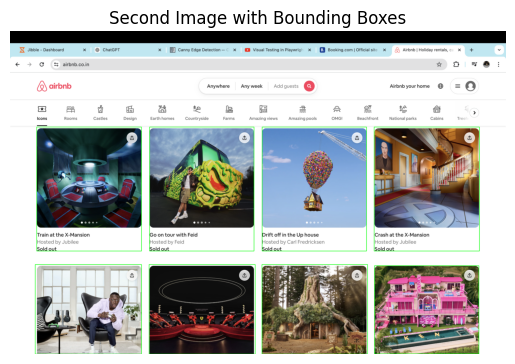

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def group_contours(contours, horizontal_proximity=30, vertical_proximity=30):
    def are_close(c1, c2):
        x1, y1, w1, h1 = cv2.boundingRect(c1)
        x2, y2, w2, h2 = cv2.boundingRect(c2)

        # Check horizontal closeness
        horizontal_close = (x2 <= x1 + w1 + horizontal_proximity) and (x1 <= x2 + w2 + horizontal_proximity)

        # Check vertical closeness
        vertical_close = (y2 <= y1 + h1 + vertical_proximity) and (y1 <= y2 + h2 + vertical_proximity)

        return horizontal_close and vertical_close

    groups = []
    used = set()

    for i in range(len(contours)):
        if i in used:
            continue
        group = [contours[i]]
        queue = [i]
        used.add(i)
        while queue:
            idx = queue.pop(0)
            for j in range(len(contours)):
                if j not in used and are_close(contours[idx], contours[j]):
                    used.add(j)
                    queue.append(j)
                    group.append(contours[j])
        groups.append(group)
    return groups


def draw_bounding_boxes_on_changes_and_save(image_path1, image_path2, save_path):
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(gray1, gray2)
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = [c for c in contours if cv2.contourArea(c) > 0]
    contour_groups = group_contours(filtered_contours)

    for group in contour_groups:
        all_points = np.vstack([cv2.boxPoints(cv2.minAreaRect(contour)) for contour in group])
        x, y, w, h = cv2.boundingRect(all_points)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imwrite(save_path, img2)

    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2_rgb)
    plt.title('Second Image with Bounding Boxes')
    plt.axis('off')
    plt.show()

# Example usage
# draw_bounding_boxes_on_changes_and_save('path_to_image_1.jpg', 'path_to_image_2.jpg', 'path_to_resulting_image.jpg')

draw_bounding_boxes_on_changes_and_save('airbnb_1.png', 'airbnb_2.png', 'processed_image.jpg')


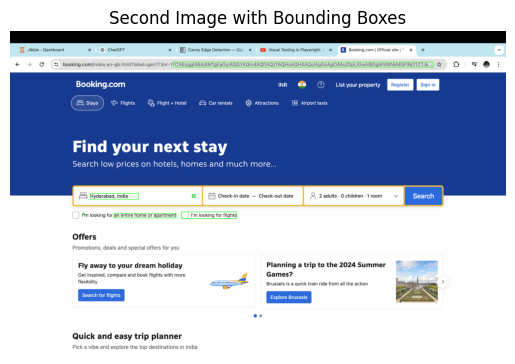

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def group_contours(contours, horizontal_proximity=30, vertical_proximity=30):
    def are_close(c1, c2):
        x1, y1, w1, h1 = cv2.boundingRect(c1)
        x2, y2, w2, h2 = cv2.boundingRect(c2)

        # Check horizontal closeness
        horizontal_close = (x2 <= x1 + w1 + horizontal_proximity) and (x1 <= x2 + w2 + horizontal_proximity)

        # Check vertical closeness
        vertical_close = (y2 <= y1 + h1 + vertical_proximity) and (y1 <= y2 + h2 + vertical_proximity)

        return horizontal_close and vertical_close

    groups = []
    used = set()

    for i in range(len(contours)):
        if i in used:
            continue
        group = [contours[i]]
        queue = [i]
        used.add(i)
        while queue:
            idx = queue.pop(0)
            for j in range(len(contours)):
                if j not in used and are_close(contours[idx], contours[j]):
                    used.add(j)
                    queue.append(j)
                    group.append(contours[j])
        groups.append(group)
    return groups


def draw_bounding_boxes_on_changes_and_save(image_path1, image_path2, save_path):
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    if img1 is None or img2 is None:
        raise FileNotFoundError("One or both images could not be loaded.")

    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(gray1, gray2)
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = [c for c in contours if cv2.contourArea(c) > 0]
    contour_groups = group_contours(filtered_contours)

    for group in contour_groups:
        all_points = np.vstack([cv2.boxPoints(cv2.minAreaRect(contour)) for contour in group])
        x, y, w, h = cv2.boundingRect(all_points)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imwrite(save_path, img2)

    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2_rgb)
    plt.title('Second Image with Bounding Boxes')
    plt.axis('off')
    plt.show()

# Example usage
draw_bounding_boxes_on_changes_and_save('Booking.com_1.png', 'Booking.com_2.png', 'processed_image.jpg')
